# m=0 Wavelet Coefficients

The wavelet basis is labelled by the indices $n$ and $m$;

$$ x[k] = \sum_{n=0}^{N_t-1} \sum_{m=0}^{N_f-1} w_{nm} g_{nm}[k] . $$

The index $m$ labels wavelets of different frequencies and varies in the range $m\in\{0,1,\ldots,N_f-1\}$.

The terms with $m=0$ include both the lowest frequency ($f\approx 0$) and the highest frequency ($f\approx f_{\rm Nyquist}$) wavelets.
These terms need to be handled separately from the majority of the terms with $m>0$. 
This slows down the wavelet transfrom.

However, very often the lowest and highest frequencies are not used for data analysis. 
E.g. when computing a GW log-likelihood we typically only integrate over a range $f_{\rm low}\leq f \leq f_{\rm high}$
where the limits are chosen to be well inside the frequency range of the FFT.

For this reason the `WDM_transform` class is by default initialised with `calc_m0=False`. 
This will speed up the transformation but will get the calculations of the $m=0$ terms wrong.
If the $m=0$ terms are needed, then set `calc_m0=True`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import WDM

In [2]:
Nf = 32
N = 32*Nf

wdm_m_all  = WDM.WDM.WDM_transform(dt=1, Nf=Nf, N=N, calc_m0=True)
wdm_m_geq0 = WDM.WDM.WDM_transform(dt=1., Nf=Nf, N=N) # default calc_m0=False

If we use the `wdm_m_geq0` wdm transform to analyse a signal with lots of power at very low (or very high) frequencies then we will get the wrong result.

In [ ]:
f = lambda u, a: np.sin(a*np.pi*u) * np.exp(-0.5*u**2)

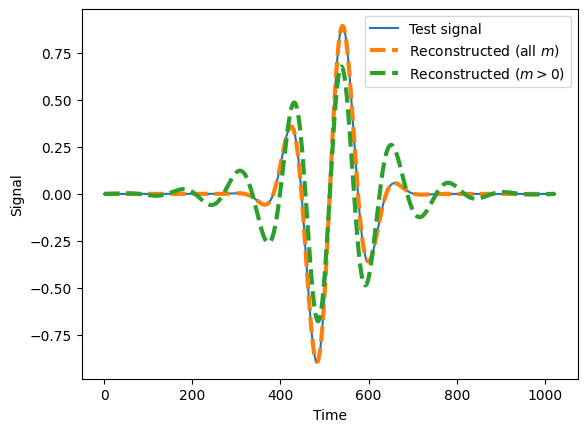

In [4]:
test_signal_lowf = f((wdm_m_all.times-wdm_m_all.T/2)/(wdm_m_all.T/16), 1)

plt.plot(wdm_m_all.times, test_signal_lowf, label='Test signal')

reconstructed_m_all = wdm_m_all.idwt(wdm_m_all.forward_transform_short_fft(test_signal_lowf))
plt.plot(wdm_m_all.times, reconstructed_m_all, label=r'Reconstructed (all $m$)', ls='--', lw=3)

reconstructed_m_geq0 = wdm_m_geq0.idwt(wdm_m_geq0.forward_transform_short_fft(test_signal_lowf))
plt.plot(wdm_m_geq0.times, reconstructed_m_geq0, label=r'Reconstructed ($m>0$)', ls='--', lw=3)

plt.xlabel('Time'); plt.ylabel('Signal'); plt.legend(loc='upper right')
plt.show()

However, for signals where all the power concentrated is in the middle of the bandwidth it will work OK.

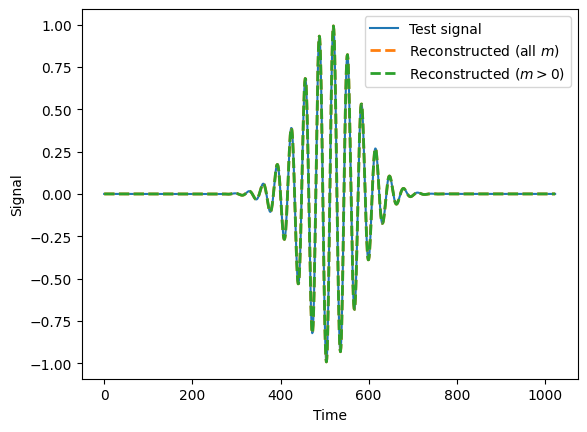

In [5]:
test_signal_highf = f((wdm_m_all.times-wdm_m_all.T/2)/(wdm_m_all.T/16), 4)

plt.plot(wdm_m_all.times, test_signal_highf, label='Test signal')

reconstructed_m_all = wdm_m_all.idwt(wdm_m_all.forward_transform_short_fft(test_signal_highf))
plt.plot(wdm_m_all.times, reconstructed_m_all, label=r'Reconstructed (all $m$)', ls='--', lw=2)

reconstructed_m_geq0 = wdm_m_geq0.idwt(wdm_m_geq0.forward_transform_short_fft(test_signal_highf))
plt.plot(wdm_m_geq0.times, reconstructed_m_geq0, label=r'Reconstructed ($m>0$)', ls='--', lw=2)

plt.xlabel('Time'); plt.ylabel('Signal'); plt.legend(loc='upper right')
plt.show()